In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import sys

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#import graphviz

import warnings
warnings.filterwarnings("ignore")

# Universidad Politécnica de Yucatán
**Supervised Learining**

![UPY logo](http://mi-escuelamx.com/aspirantes_registro_upy/Imagenes/logoEncabezado.png)

# Student:

-  **Walter Vives**


# Decision Trees
**Activity 3.3**



## Objective

The  student  will  develop  algorithmic classification procedures  to  be  able  to  implement supervised learning models.

## Instructions

On the night of April 14th, 1912 the Titanic struck an iceberg, ultimately sinking the vessel. The Titanic sent distress signals by telegraph and, although there were other ships nearby, no assistance was promptly provided.Using information about passengers of the Titanic, we are interested in building a model based on a decision tree to say something about the chances of surviving the disaster. The data  can  be  obtained  from  the  Kaggle  competition  “Titanic:  Machine  learning  from Disaster” at the following URL: https://www.kaggle.com/c/titanic.The training data provided contains 891 records with the following attributes: 
- Survived: 0= No; 1 = Yes
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: Passenger name The attributes in the Titanic dataset.
- Sex: (female; male)
- Age: Passenger age
- SibSp: Number of Siblings/Spouses Aboard
- Parch: Number of Parents/Children Aboard
- Ticket:Ticket Number
- Fare: Passenger Fare
- Cabin: Cabin
- Embarked: Port of Embarkation (C = Cherbourg;Q = Queenstown; S = Southampton)

**1.** Consider a set of points (n elements) with a total of c classes. Let us denote the
fraction of records that belong to class i at a given node n as p(i|n). Some popular measure of impurity include the following:

  1. Entropy:
       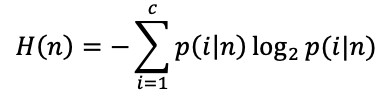
  2. Gini:
       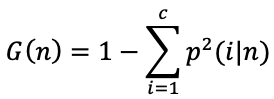
  3. Classification Error:
       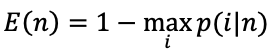


Consider that you only has two classes (0,1). Make a plot of the different impurity
measures as a function of p(1|n). Research about the uses

Entropy: Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node.

Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.  Entropy in statistics is analogous to entropy in thermodynamics where it signifies disorder. If there are multiple classes in a node, there is disorder in that node. 

Information gain is the entropy of parent node minus sum of weighted entropies of child nodes. 
 Weight of a child node is number of samples in the node/total samples of all child nodes. Similarly information gain is calculated with gini score. 


Information is a measure of a reduction of uncertainty. It represents the expected amount of information that would be needed to place a new instance in a particular class. These informativeness measures form the base for any decision tree algorithms. When we use Information Gain that uses Entropy as the base calculation, we have a wider range of results whereas the Gini Index caps at one. [1]

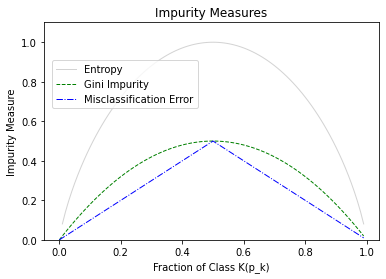

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, gini(x), c_err],
      ['Entropy', 'Gini Impurity', 'Misclassification Error'],
      ['-', '--', '-.'],
      ['lightgray', 'green', 'blue']):
    line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

plt.ylim([0, 1.1])
plt.title("Impurity Measures")
plt.xlabel("Fraction of Class K(p_k)")
plt.ylabel('Impurity Measure')
plt.show()

            age students Class: buys_computer
0         youth       no                   no
1         youth       no                   no
2   middle_aged       no                  yes
3        senior       no                  yes
4        senior      yes                  yes
5        senior      yes                   no
6   middle_aged      yes                  yes
7         youth       no                   no
8         youth      yes                  yes
9        senior      yes                  yes
10        youth      yes                  yes
11  middle_aged       no                  yes
12  middle_aged      yes                  yes
13       senior       no                   no
Number of samples in each class is:
yes    9
no     5
Name: Class: buys_computer, dtype: int64

Gini Impurity of the class is 0.459
Gini for age is 0.343
Gini for students is 0.367


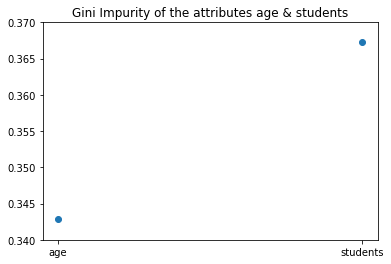

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


In [3]:
#### Gini Impurity Split Example ####

# Data
students_data = ["no","no","no","no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "no", "yes", "no"]
Class_data = ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
age_data = ["youth", "youth","middle_aged", "senior", "senior", "senior", "middle_aged", "youth", "youth", "senior", "youth", "middle_aged", "middle_aged", "senior"]
data = {"age":age_data, "students":students_data, "Class: buys_computer": Class_data}
df1 = pd.DataFrame(data)
print(df1)

attribute_names = ["age", "students"]
class_name = "Class: buys_computer"

# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum += (value_counts[key]/n)**2
        
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

# STEP 2: 
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')
    
plt.scatter(*zip(*gini_attiribute.items()))
plt.title("Gini Impurity of the attributes age & students")
plt.ylim(0.340,0.370)
plt.show()


# STEP 3: 
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

**2.** Consider the following preprocessing steps:

      1. Lead the Data into a Pandas Dataframe.
      2. Delete the Ticket and Cabin Columns.
      3. Drop instance without values in the rest of the Dataframe.

In [4]:
# Load file
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape
print("Columns: {}".format(df.shape[1]))
print("Rows: {}".format(df.shape[0]))

Columns: 12
Rows: 891


In [6]:
# Columns
for column in enumerate(df.columns):
    print(column)

(0, 'PassengerId')
(1, 'Survived')
(2, 'Pclass')
(3, 'Name')
(4, 'Sex')
(5, 'Age')
(6, 'SibSp')
(7, 'Parch')
(8, 'Ticket')
(9, 'Fare')
(10, 'Cabin')
(11, 'Embarked')


In [7]:
# Statistical Descriptors
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Missing Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Delete Ticket & Cabin columns
df.drop(["Ticket", "Cabin"], axis = 1, inplace = True)
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,8.05,S


In [11]:
# Remove Missing Values
df.dropna(inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**3.** Let us perform data exploration and see the percentage of passengers who survived the disaster, categorized by travelling class and gender:

      1. Construct a cross-tabulation of the travel class vs survival with crosstab. Calculate the percentage
         of survivor per class.
      2. Complete the same as 3a but per gender.

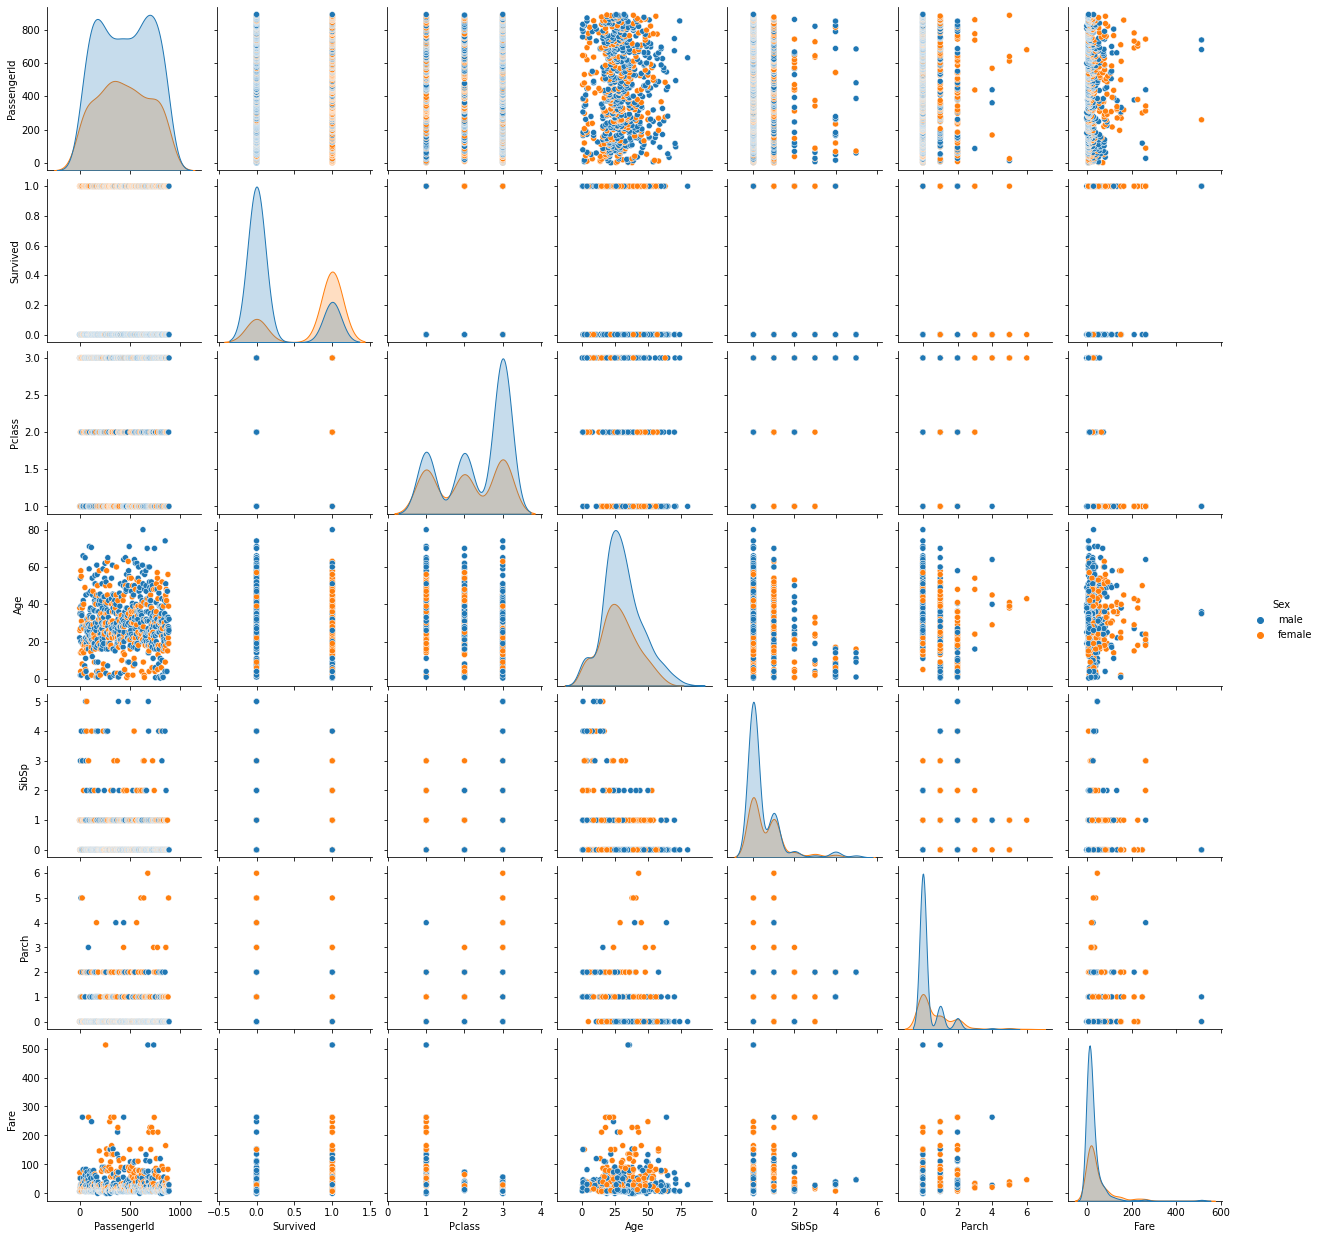

In [12]:
# Seaborn Pairplot
sns.pairplot(df, kind = "scatter", hue = "Sex")
plt.show()

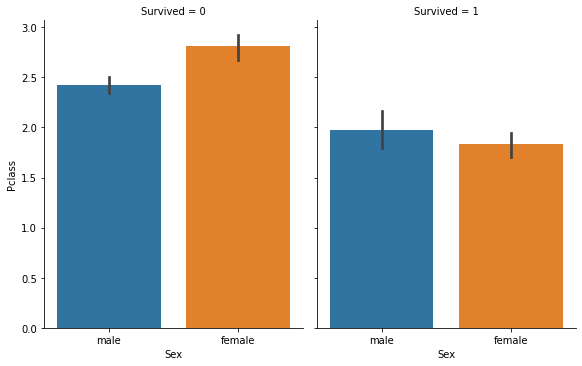

In [13]:
sns.catplot(x="Sex", y="Pclass",
                col="Survived", data=df,
                height=5, aspect=.8, kind = "bar")
plt.show()

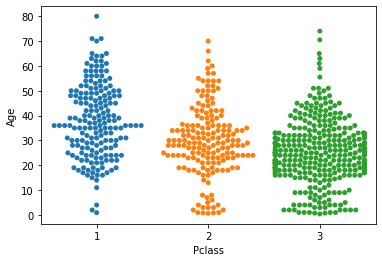

In [14]:
sns.swarmplot(x='Pclass',y='Age',data=df)
plt.show()

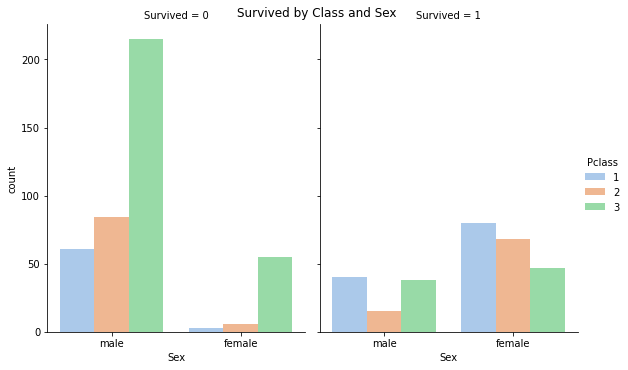

In [15]:
sns.catplot(x = "Sex", hue = "Pclass",
                col = "Survived", data = df,
                height = 5, aspect = .8, kind = "count", 
                palette = sns.color_palette("pastel"))
plt.suptitle("Survived by Class and Sex")
plt.show()

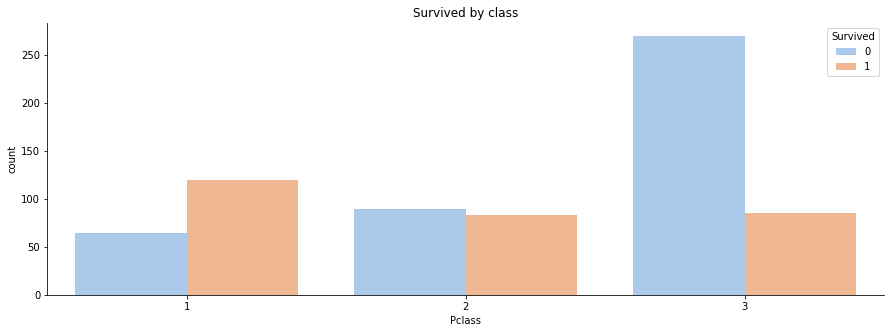

In [16]:
# countplot
fig, ax = plt.subplots(figsize = (15,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.countplot(x = "Pclass", hue = "Survived", data = df, palette = sns.color_palette("pastel"))
plt.title("Survived by class")
plt.show()

In [17]:
#Construct a cross-tabulation of the travel class vs survival with crosstab. Calculate the percentage
# of survivor per class.

# Crosstab
pd.crosstab(index = df["Pclass"], columns = df["Survived"], rownames = ["Class"],
            margins = True, margins_name = "Total")

Survived,0,1,Total
Class,,,
1,64,120,184
2,90,83,173
3,270,85,355
Total,424,288,712


In [18]:
#Complete the same as the pass point but per gender.
pd.crosstab(index = df["Sex"], columns = df["Survived"], rownames = ["Genre"],
            margins = True, margins_name = "Total")

Survived,0,1,Total
Genre,,,
female,64,195,259
male,360,93,453
Total,424,288,712


**4.** For modelling only, a subset of the features provided will be used: class, gender and
age. Remember that Scikit-learn only takes numerical values.

      1. Get dummy variables (get_dummies) from the gender. Append two columns,
         one called female and the other one called male, indicating the values with
         0 and 1.
      2. Split the dataset into train (70%) and test (30%). Only include one gender
         column (female or male).

In [19]:
# Data Preparation
df_data = df[["Pclass", "Sex", "Age"]]
df_target = df["Survived"]

In [20]:
# Categorical to numerical
pd.get_dummies(data = df["Sex"]).sample()

,female,male
426,1,0


In [21]:
df_data["Sex"] = pd.get_dummies(data = df["Sex"], drop_first = True)
df_data.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [22]:
# Split Train & Test
data_train, data_test, target_train, target_test = train_test_split(df_data,
                                                                   df_target,
                                                                   train_size = 0.80,
                                                                   test_size = 0.20,
                                                                   random_state = 42)
# Shape
print("Data train: ", data_train.shape)
print("Data test: ", data_test.shape)

print("\ntarget train: ", target_test.shape)
print("target test: ", target_test.shape)

Data train:  (569, 3)
Data test:  (143, 3)

target train:  (143,)
target test:  (143,)


**5.** Scikit-learn provides a decision tree model in DecisionTreeClassifier(), accepting
various parameters such as the impurity criterion taking values such as entropy and gini. We can also affect the pruning with parameters such as max_depth and min_samples_leaf, the former determines the maximum depth (levels) of the tree, whereas the latter determines the minimum number of data instances required to split an internal node.
     
     1. Create a two DecisionTreeClassifier() with max_depth = 5 but with different criterion (Gini, Entropy).
     2. Compute the confusion matrix and print the Accuracy.
     3. Make a visualization of the best Decision Tree with max_depth = 3 using
        Graphviz.

**Gini Criterion**

In [23]:
#### Gini Criterion ####

# Model Creation
DecisionTreeGini = DecisionTreeClassifier(max_depth = 5, criterion = "gini")

# Model Fit
DecisionTreeGini.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
# Model Prediction
y_pred = DecisionTreeGini.predict(data_test)

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(target_test, y_pred)
conf_matrix

array([[74,  6],
       [29, 34]])

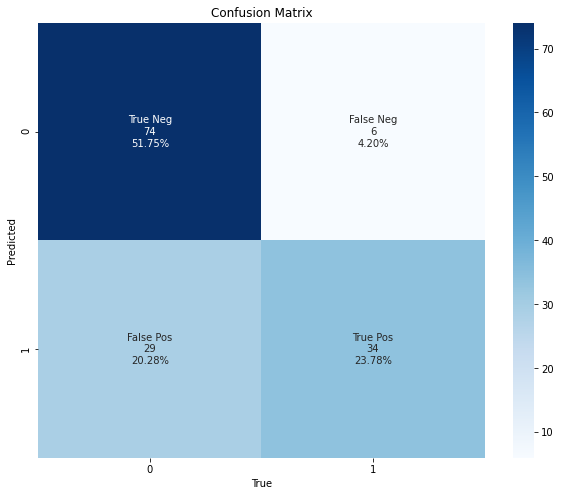

In [26]:
# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))

group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

* True Positive (TP): 34
* True Negative (TN): 74
* False Positive (FP): 29
* False Negative (FN): 6

In [27]:
# Model Evaluation
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        80
           1       0.85      0.54      0.66        63

    accuracy                           0.76       143
   macro avg       0.78      0.73      0.73       143
weighted avg       0.78      0.76      0.74       143



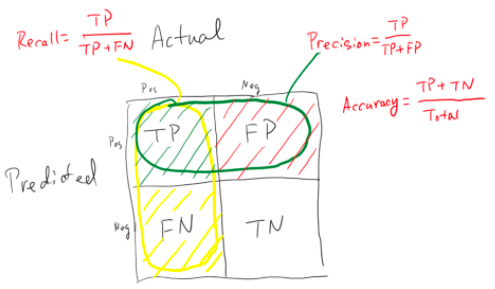

**Recall**
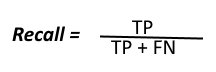
Out of all the positive classes, how much we predicted correctly. It should be high as possible

**Precision**
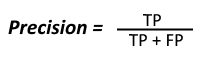
Out of all the positive classes we have predicted correctly, how many are actually positive.

**Entropy Creterion**

In [28]:
#### entropy Criterion ####

# Model Creation
DecisionTreeEntropy = DecisionTreeClassifier(max_depth = 5, criterion = "entropy")

# Model Fit
DecisionTreeEntropy.fit(data_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
# Model Prediction
y_pred = DecisionTreeEntropy.predict(data_test)

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(target_test, y_pred)
conf_matrix

array([[78,  2],
       [34, 29]])

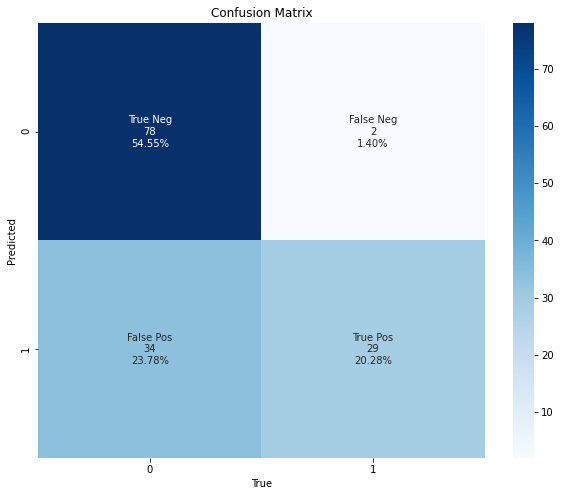

In [31]:
# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))

group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

* True Positive (TP): 29
* True Negative (TN): 78
* False Positive (FP): 34
* False Negative (FN): 2

In [32]:
# Model Evaluation
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        80
           1       0.94      0.46      0.62        63

    accuracy                           0.75       143
   macro avg       0.82      0.72      0.71       143
weighted avg       0.80      0.75      0.73       143



**Comparation**
- Decision Tree with Gini Criterion Acurracy: 0.76
- Decision Tree with Entropy Criterion Acurracy: 0.75

**Decision Tree with max_depth = 3**

**Gini Criterion**

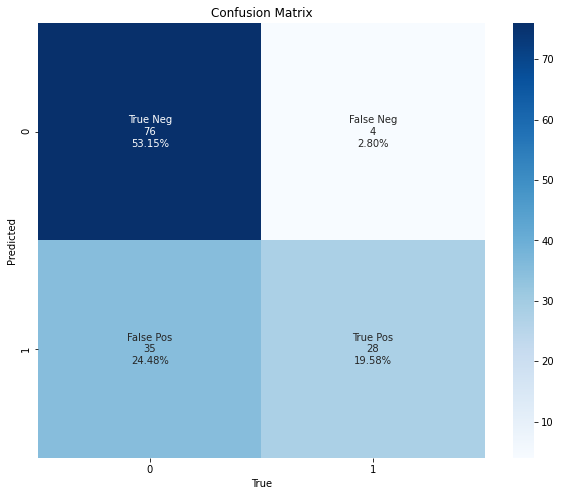

In [33]:
#### Gini Criterion max_depth = 3 ####

# Model Creation
DecisionTreeGini = DecisionTreeClassifier(max_depth = 3, criterion = "gini")

# Model Fit
DecisionTreeGini.fit(data_train, target_train)

# Model Prediction
y_pred = DecisionTreeGini.predict(data_test)

# Confusion Matrix
conf_matrix = confusion_matrix(target_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))

group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

In [34]:
# Model Evaluation
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.95      0.80        80
           1       0.88      0.44      0.59        63

    accuracy                           0.73       143
   macro avg       0.78      0.70      0.69       143
weighted avg       0.77      0.73      0.70       143



**Entropy Crietrion**

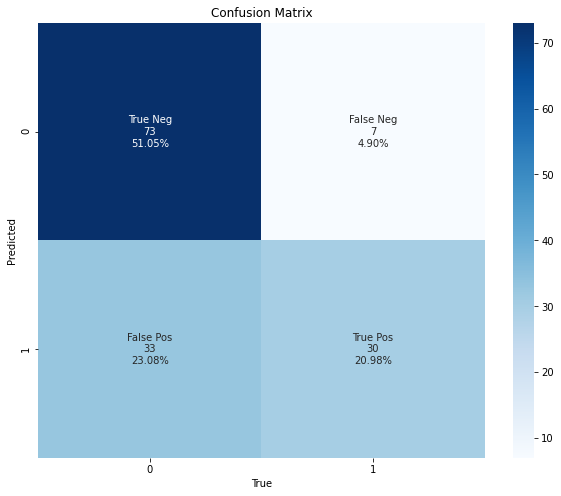

In [35]:
#### entropy Criterion ####

# Model Creation
DecisionTreeEntropy = DecisionTreeClassifier(max_depth = 3, criterion = "entropy")

# Model Fit
DecisionTreeEntropy.fit(data_train, target_train)

# Model Prediction
y_pred = DecisionTreeEntropy.predict(data_test)

# Confusion Matrix
conf_matrix = confusion_matrix(target_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))

group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

In [36]:
# Model Evaluation
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        80
           1       0.81      0.48      0.60        63

    accuracy                           0.72       143
   macro avg       0.75      0.69      0.69       143
weighted avg       0.74      0.72      0.70       143



**Make a visualization of the best Decision Tree with max_depth = 3 using
    Graphviz.**

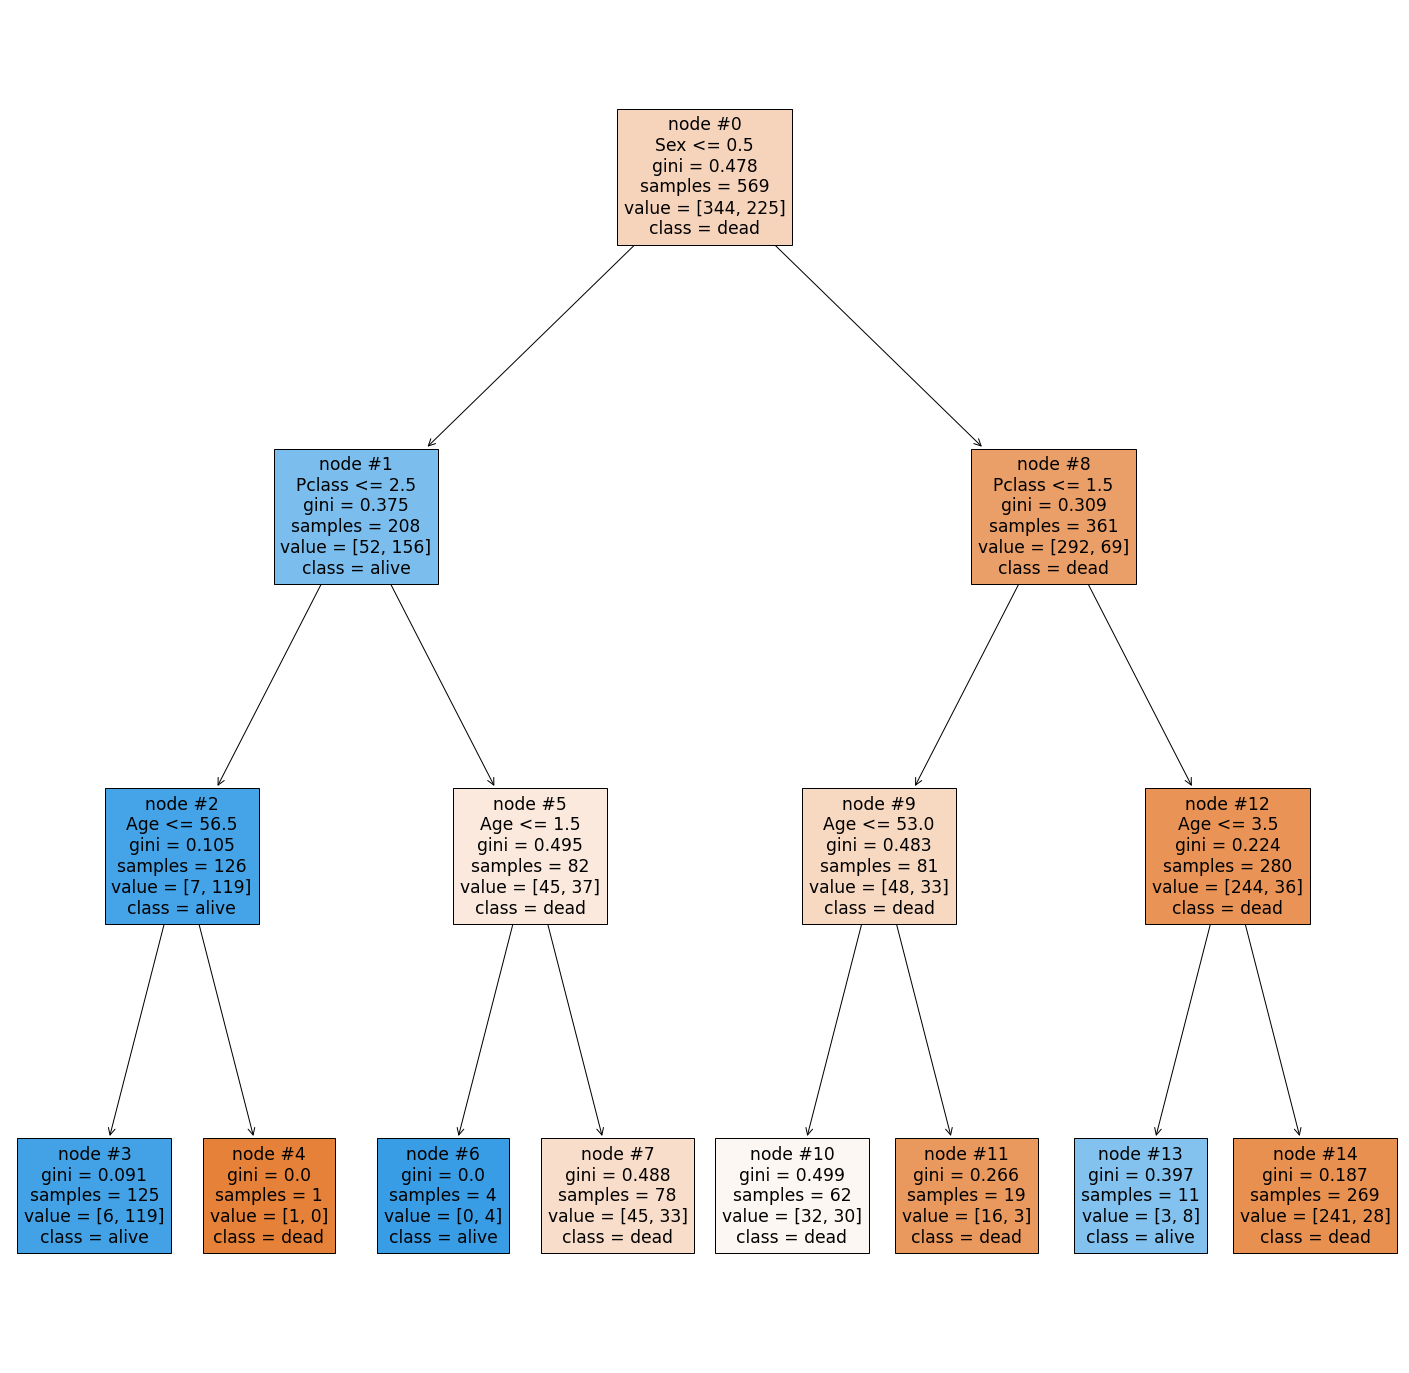

In [37]:
# plot of gini criterion max_Depth = 3
plt.figure(figsize=(25,25))
plot_tree(DecisionTreeGini, feature_names = ["Pclass", "Sex", "Age"],
          class_names = ["dead", "alive"], filled = True, impurity = True,
          node_ids = True)
plt.show()

**6.** Use GridSearchCV (sklearn.model_selection) to determine the best values of the
maximum depth and minimum number of samples. Consider the following:

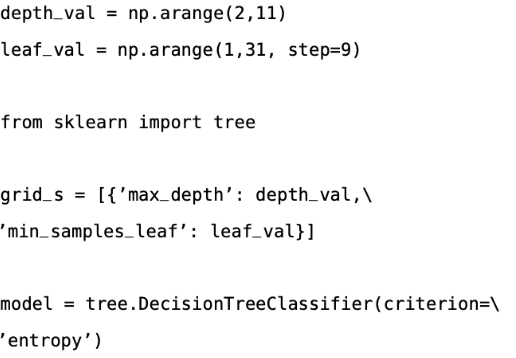

A. Run the GridSearchCV with model as estimator, grid_s as param_grid and
       10-fold cross validation (cv).

B. Print the best parameters (“max_depth” and “min_samples_leaf”).

C. Create a heatmap of men cross-validation scores for the decision tree
classification of the Titanic passenger for different values of maximum depth and minimum sample leaf. It must look like:

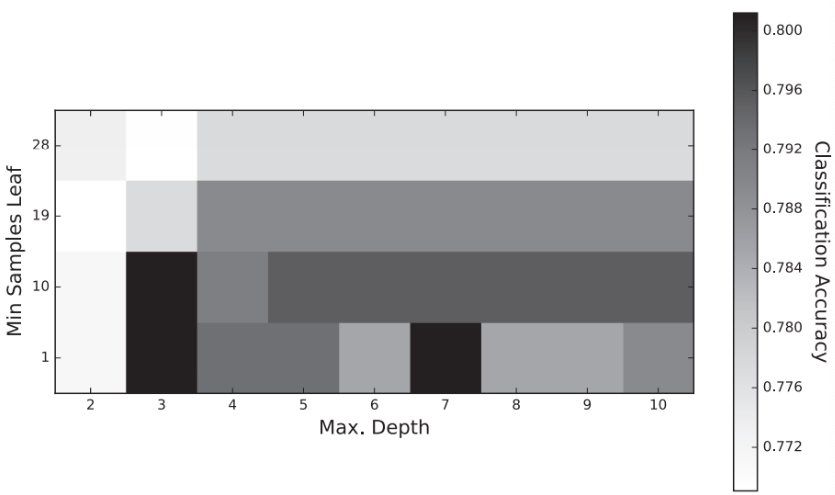

In [38]:
depth_val = np.arange(2,11)
leaf_val = np.arange(1, 31, step=9)
grid_s = [{'max_depth': depth_val, 'min_samples_leaf': leaf_val}]
model = DecisionTreeClassifier(criterion = 'gini')
Grid_Search_Model = GridSearchCV(estimator = model, param_grid = grid_s, cv = 10)
Grid_Search_Model.fit(data_train, target_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'min_samples_leaf': array([ 1, 10, 19, 28])}])

In [39]:
Grid_Search_Model.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [40]:
results_dict = Grid_Search_Model.cv_results_
results_df = pd.DataFrame(results_dict)

params_results = results_df[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
params_results = params_results.pivot('param_min_samples_leaf', 'param_max_depth', 'mean_test_score')
params_results.head()

param_max_depth,2,3,4,5,6,7,8,9,10
param_min_samples_leaf,,,,,,,,,
1,0.80141,0.773340,0.806673,0.782049,0.790915,0.789129,0.782143,0.782174,0.776911
10,0.80141,0.775094,0.783866,0.762719,0.778571,0.775063,0.775063,0.775063,0.775063
19,0.80141,0.752287,0.759273,0.759273,0.759273,0.759273,0.759273,0.759273,0.759273
28,0.80141,0.773340,0.773340,0.773340,0.773340,0.773340,0.773340,0.773340,0.773340


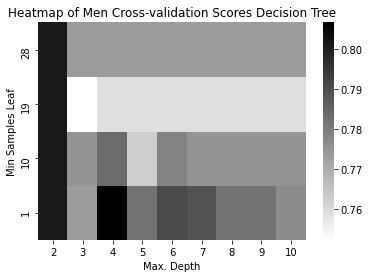

In [41]:
# Heatmap
ax = sns.heatmap(params_results, cmap = "gray_r")
ax.invert_yaxis()
plt.title("Heatmap of Men Cross-validation Scores Decision Tree")
plt.xlabel('Max. Depth')
plt.ylabel('Min Samples Leaf')

plt.show()

**7.** Apply the model to the testing subset:

    A. Compute the confusion matrix and print the Accuracy.

    B. Make a visualization of the Decision Tree with max_depth = 3 using
Graphviz.

In [42]:
# Grid Prediction
grid_prediction = Grid_Search_Model.predict(data_test)

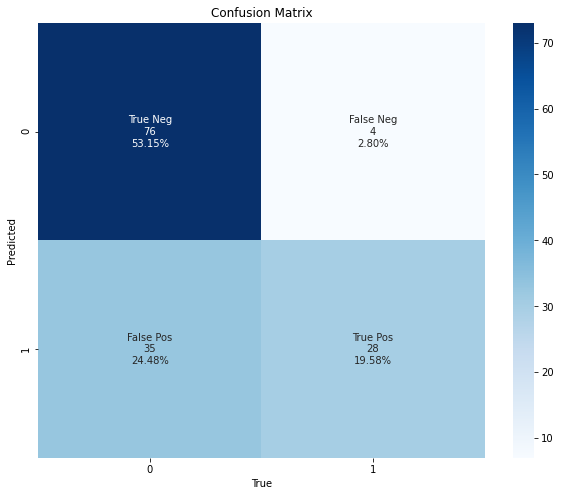

In [43]:
# Confusion Matrix
c_matrix = confusion_matrix(target_test, grid_prediction)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))



group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix.flatten()/np.sum(c_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

In [44]:
# Model Evaluation
print(classification_report(target_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.68      0.95      0.80        80
           1       0.88      0.44      0.59        63

    accuracy                           0.73       143
   macro avg       0.78      0.70      0.69       143
weighted avg       0.77      0.73      0.70       143



In [45]:
# Accuracy 
acc_grid = accuracy_score(target_test, grid_prediction)
print("The accuracy for Gini is: ", acc_grid)

The accuracy for Gini is:  0.7272727272727273


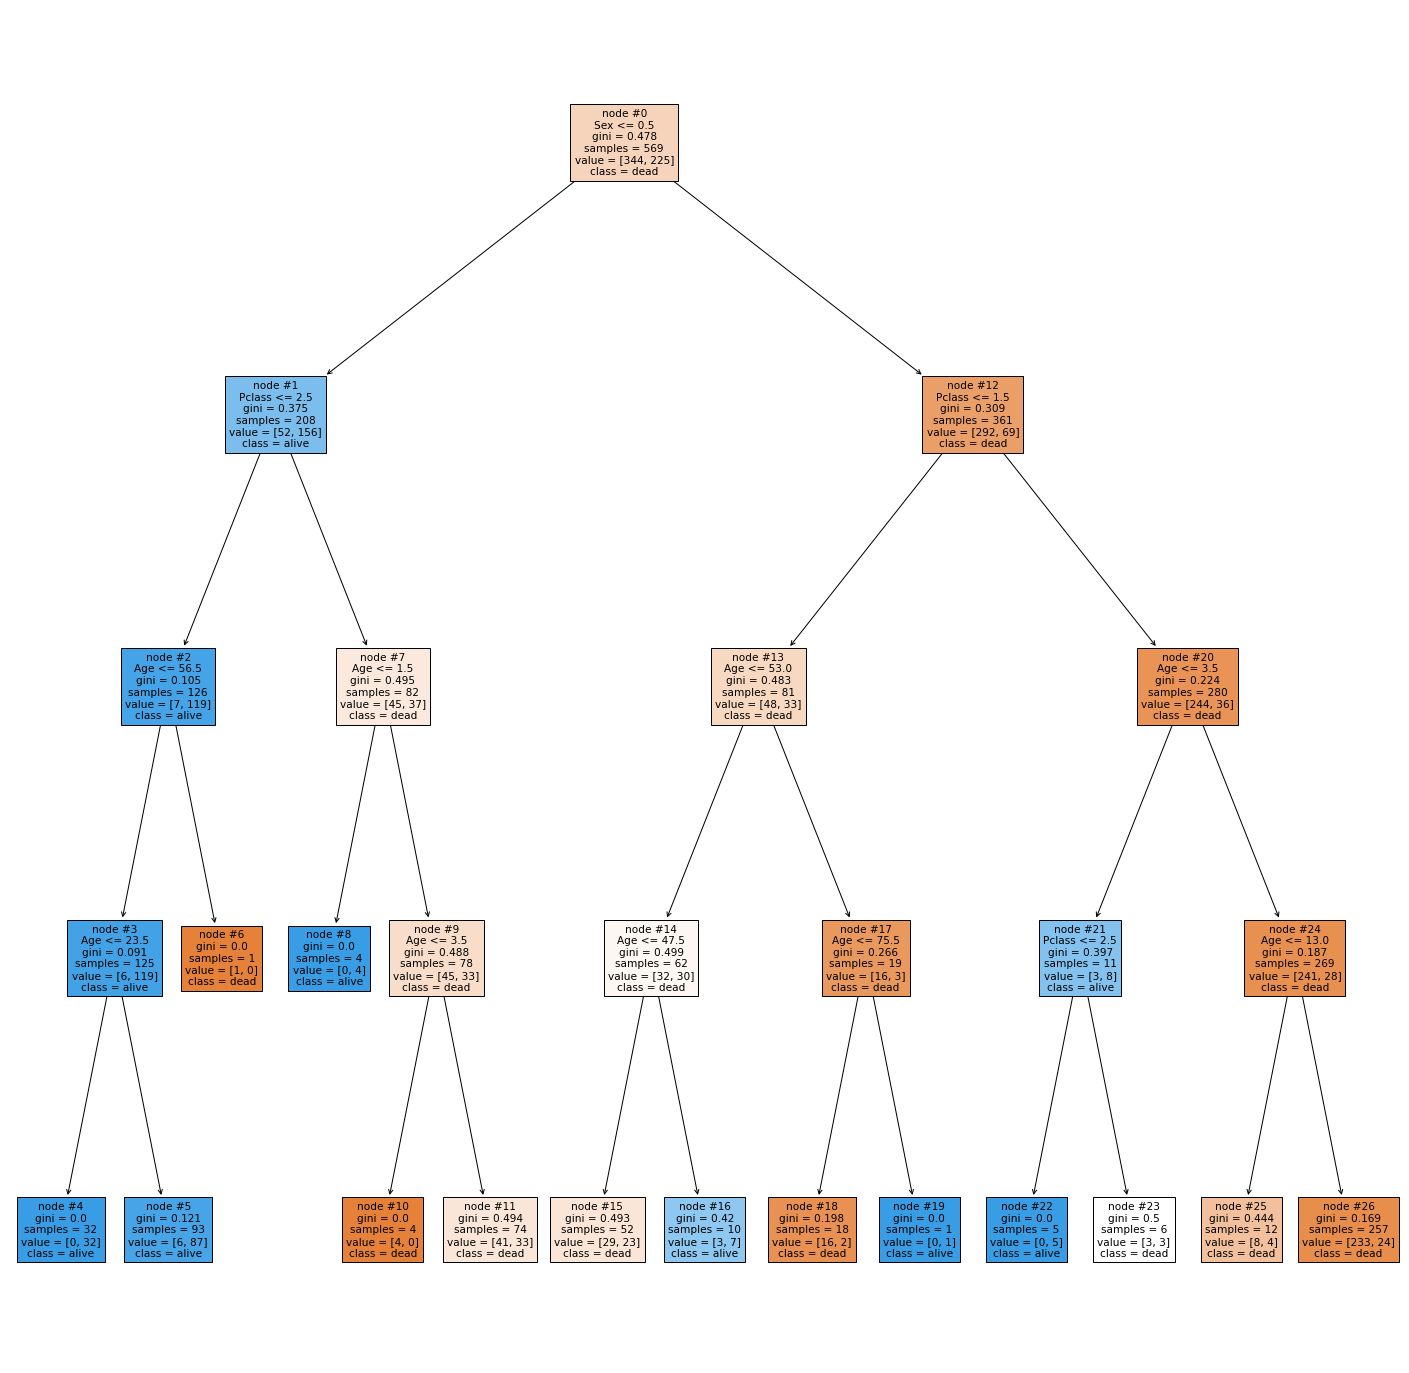

In [46]:
# plot of gini criterion max_Depth = 3
plt.figure(figsize=(25,25))
plot_tree(Grid_Search_Model.best_estimator_, feature_names = ["Pclass", "Sex", "Age"],
          class_names = ["dead", "alive"], filled = True, impurity = True,
          node_ids = True)
plt.show()

### REFERENCE
[1] THAT-A-SCIENCE. Retrived from: https://thatascience.com/learn-machine-learning/gini-entropy/